In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

## Отличие `list` от `np.array`
**List в Python** - ячейки, которые хранятся где попало. \
**В numpy** - элементы лежат друг за другом. \
Это создает сложности, но эффективно, знаем тип данных. \
`a[i][j]` это как `n * i + j` элемент - |00|01|02|10|11|12| - как-то так хранятся элементы. 

## Создание `np.ndarray`

In [2]:
a = [1, 2, 2.7]
print(np.array(a)) # создание от массива, тип float
print('-' * 30)
print(np.array(a, int)) # изменение типа 
print('-' * 30)
print(np.array(a, str))

[1.  2.  2.7]
------------------------------
[1 2 2]
------------------------------
['1' '2' '2.7']


## Создание базовых `np.array`

In [3]:
zeros = np.zeros((3, 4), dtype=float)
ones = np.ones((2, 3))
eye = np.eye(4, 2, dtype=int)
full = np.full((2,2,2), -1)
geom = np.geomspace(1, 1000, num=4)
diag = np.diag([1, 2, 3], k=-1)
tri = np.tri(3, 4, 1)
vander = np.vander([1, 2, 3])
print(zeros)
print('-' * 30)
print(ones)
print('-' * 30)
print(eye)
print('-' * 30)
print(full)
print('-' * 30)
print(geom)
print('-' * 30)
print(diag)
print('-' * 30)
print(tri)
print('-' * 30)
print(vander)


[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
------------------------------
[[1. 1. 1.]
 [1. 1. 1.]]
------------------------------
[[1 0]
 [0 1]
 [0 0]
 [0 0]]
------------------------------
[[[-1 -1]
  [-1 -1]]

 [[-1 -1]
  [-1 -1]]]
------------------------------
[   1.   10.  100. 1000.]
------------------------------
[[0 0 0 0]
 [1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]]
------------------------------
[[1. 1. 0. 0.]
 [1. 1. 1. 0.]
 [1. 1. 1. 1.]]
------------------------------
[[1 1 1]
 [4 2 1]
 [9 3 1]]


## Функции для создание одномерных массивов

In [4]:
a = np.arange(1, 10)
b = np.linspace(0, 9, 11, endpoint=True)
c = np.logspace(2, 4, 5, endpoint=True, base=3, dtype=int) # base^2 .. base^4 - 5 штук
print(a)
print('-' * 30)
print(b)
print('-' * 30)
print(c)

[1 2 3 4 5 6 7 8 9]
------------------------------
[0.  0.9 1.8 2.7 3.6 4.5 5.4 6.3 7.2 8.1 9. ]
------------------------------
[ 9 15 27 46 81]


In [5]:
a_resh = np.arange(1, 5).reshape(2, 2)
print(a_resh)
print('-' * 30)
print(a_resh[0, 0]) # <=> a_resh[0][0]
print('-' * 30)
print(a_resh[0]) 
print('-' * 30)
print(a_resh[0:1]) # двумерный массив
print('-' * 30)
print(a_resh[-1][:])
print('-' * 30)
print(a_resh.shape) # кортеж

[[1 2]
 [3 4]]
------------------------------
1
------------------------------
[1 2]
------------------------------
[[1 2]]
------------------------------
[3 4]
------------------------------
(2, 2)


## `flatten()` и `ravel()`

In [6]:
a = np.arange(1, 13).reshape(2, 2, 1, 3)
print(a)
print('-' * 30)
print(a.T) # обратный порядок осей
print('-' * 30)
print(a.shape, ' ',  a.T.shape)
print('-' * 30)
b = a.flatten() # распрямлеяем массив, новая копия
print(b)
b[0] = 100
print('-' * 30)
print(b[0], a[0][0][0][0])
print('-' * 30)
c = a.ravel() # распремляем массив, не создаём копию
print(c)
print('-' * 30)
c[0] = 100
print(c[0], a[0][0][0][0])

[[[[ 1  2  3]]

  [[ 4  5  6]]]


 [[[ 7  8  9]]

  [[10 11 12]]]]
------------------------------
[[[[ 1  7]
   [ 4 10]]]


 [[[ 2  8]
   [ 5 11]]]


 [[[ 3  9]
   [ 6 12]]]]
------------------------------
(2, 2, 1, 3)   (3, 1, 2, 2)
------------------------------
[ 1  2  3  4  5  6  7  8  9 10 11 12]
------------------------------
100 1
------------------------------
[ 1  2  3  4  5  6  7  8  9 10 11 12]
------------------------------
100 100


 `concatenate((arr1, arr2), axis)` \
 `vstack(arr1, arr2) <=> axis = 0` (друг под другом) \
 `hstack(arr1, arr2) <=> axis = 1 (arr1-arr2)`

In [7]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])
print(a)
print('-' * 30)
print(b)
print('-' * 30)
c = np.concatenate((a, b), axis=0) # vstack
print(c)
print('-' * 30)
d = np.concatenate((a, b), axis=1) # hstack
print(d)

[[1 2]
 [3 4]]
------------------------------
[[5 6]
 [7 8]]
------------------------------
[[1 2]
 [3 4]
 [5 6]
 [7 8]]
------------------------------
[[1 2 5 6]
 [3 4 7 8]]


## Conditions

In [8]:
a = np.arange(20)
print(a[(a > 10) & (a <= 15) | (a == 19)])
print('-' * 30)
a[a > 10] *= 4
print(a)

[11 12 13 14 15 19]
------------------------------
[ 0  1  2  3  4  5  6  7  8  9 10 44 48 52 56 60 64 68 72 76]


`np.where, np.clip()`

In [9]:
a = np.arange(20).reshape(4, 5)
a = np.where(a > 10, a * 10, a) # np.where(cond, act_1, act_2)
print(a)
print('-' * 30)
a = np.clip(a, 7, 100) # все элементы, которые меньше 7 станут 7, все, что больше 100 - станут 100.
print(a)

[[  0   1   2   3   4]
 [  5   6   7   8   9]
 [ 10 110 120 130 140]
 [150 160 170 180 190]]
------------------------------
[[  7   7   7   7   7]
 [  7   7   7   8   9]
 [ 10 100 100 100 100]
 [100 100 100 100 100]]


## Что умеем?
`sum, std` (стандартное отклонение)`, mean, max, min, prod` (произведение) \
`argmin, argmax` - индексы наим, наиб (1ое вхождение) \
`nonzero` - ненулевые значения (выводит их индексы) \
`sort, unique` - сортировка и уникальные \
`diag, trace` - диаг, след \
`cumsum, cumprod` - кумулятивные сумма и пр-е \
`isnan, isinf, isposinf, isneginf` \
`nan_to_num(x - np.array, nan=, posinf=, neginf)` - если видим nan/inf, меняем его на заданное

In [10]:
a = np.array([np.nan, np.nan, np.inf, -np.inf])
a = np.nan_to_num(a, nan=0, posinf=999, neginf=-999)
print(a.mean(), a.std(), a.max(), a.min())
print('-' * 30)
print(a.nonzero())
print('-' * 30)
print(a.cumsum())
print('-' * 30)
print(a.sum(axis=0))

0.0 706.399674405361 999.0 -999.0
------------------------------
(array([2, 3], dtype=int64),)
------------------------------
[  0.   0. 999.   0.]
------------------------------
0.0


## Линейная алгебра

`np.linalg`

In [11]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]], dtype=int)
c = np.array([[9, 10], [11, 12]])
print(np.linalg.multi_dot([a, b, c]))
print('-' * 30)
print(np.linalg.matrix_power(a, 2))
print('-' * 30)
print(np.linalg.det(b))
print('-' * 30)
s = np.array([2, 3])
np.linalg.solve(a, s) # x : ax = s

[[ 413  454]
 [ 937 1030]]
------------------------------
[[ 7 10]
 [15 22]]
------------------------------
-2.000000000000005
------------------------------


array([-1. ,  1.5])

`np.einsum`

In [12]:
a = np.array([[1, 2], [3, 4], [5, 6]])
b = np.array([[7, 8], [9, 10]])
print(np.einsum("ij,jk->ik", a, b)) # произведение матриц 
print('-' * 30)
print(np.einsum("ij-> ", a)) # сумма элементов матрицы
print('-' * 30)
print(np.einsum("ii-> ", b)) # след матрицы
print('-' * 30)
print(np.einsum("ij,ij->ij", a, a)) # квадрат каждого элемента
print('-' * 30)
print(np.einsum("ij->ji", a)) # транспонирование


[[ 25  28]
 [ 57  64]
 [ 89 100]]
------------------------------
21
------------------------------
17
------------------------------
[[ 1  4]
 [ 9 16]
 [25 36]]
------------------------------
[[1 3 5]
 [2 4 6]]


In [13]:
print(np.add([1, 2], [3, 4]))
print('-' * 30)
print(np.subtract([1, 2], [3, 4]))
print('-' * 30)
print(np.multiply([1, 2], [3, 4]))
print('-' * 30)
print(np.divide([1, 2], [3, 4]))

[4 6]
------------------------------
[-2 -2]
------------------------------
[3 8]
------------------------------
[0.33333333 0.5       ]


In [14]:
# изменение порядка столбцов
arr = np.arange(9).reshape(3, 3)
print(arr)
print('-' * 30)
print(arr[:, [1,0,2]])

[[0 1 2]
 [3 4 5]
 [6 7 8]]
------------------------------
[[1 0 2]
 [4 3 5]
 [7 6 8]]


In [15]:
arr = np.arange(1, 7)
print(arr)
print('-' * 30)
print(arr.cumprod()) # факториалы от 1 до 7

[1 2 3 4 5 6]
------------------------------
[  1   2   6  24 120 720]


Время работы `einsum` и других функций

In [16]:
# возведение в 4 степень элементов матрицы
x = np.arange(1, 5e7)
%timeit np.einsum('i,i,i,i->i', x, x, x, x)
%timeit x**4
%timeit np.power(x, 4)

534 ms ± 125 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.35 s ± 33.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.32 s ± 19 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


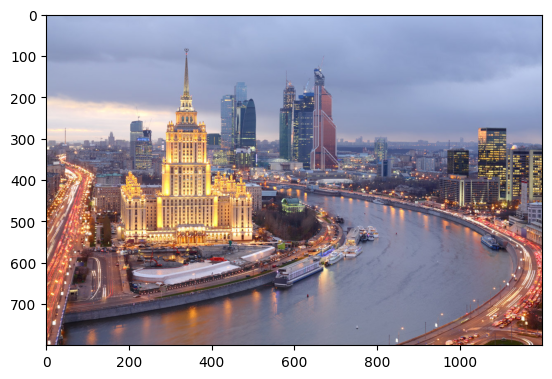

In [17]:
url = 'https://avatars.dzeninfra.ru/get-zen_doc/1132604/pub_64ee5b4c260c5d787760826c_64ee610579aeaf5303728643/scale_1200'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
plt.imshow(img)
plt.show()

In [18]:
image_arr = np.array(img)
sepia_matrix = np.array([[0.393, 0.769, 0.189], [0.349, 0.686, 0.168], [0.272, 0.534, 0.131]])
# image_arr = image_arr @ sepia_matrix.T - аналогично следующей строке
sepia_image_arr = np.einsum('ijs,sk->ijk', image_arr, sepia_matrix.T)
sepia_image_arr = np.clip(sepia_image_arr, 0, 255) 
sepia_image_arr = sepia_image_arr.astype(np.uint8)

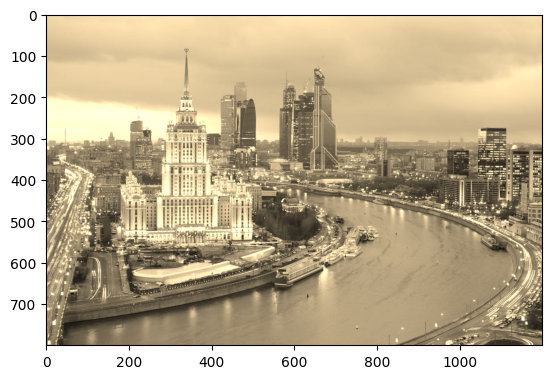

In [19]:
new_img = Image.fromarray(sepia_image_arr)
plt.imshow(new_img)
plt.show()

Сравнение по времени работы функций `numpy` и циклов `Python`

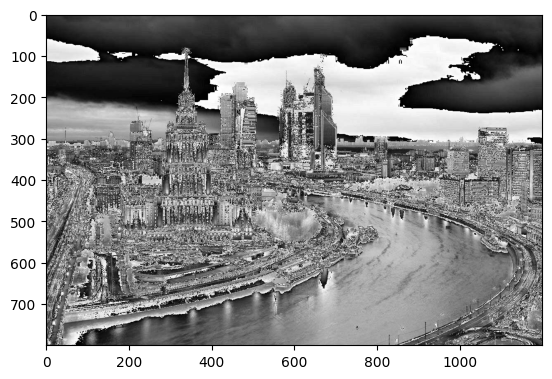

Время выполнения блока кода: 0.4447486400604248 секунд


In [20]:
start_time = time.time()
same_pix = image_arr.copy() # в итоге хочу матрицу, у которой будут равны r, g, b для каждого 
same_pix = same_pix.sum(axis=2)
same_pix = np.concatenate((same_pix.reshape(800, 1200, 1), same_pix.reshape(800, 1200, 1), same_pix.reshape(800, 1200, 1)), axis = 2) # 800 x 1200 - размеры картинки
same_pix = same_pix.astype(np.uint8)
new_img1 = Image.fromarray(same_pix)
plt.imshow(new_img1)
plt.show()
end_time = time.time()
execution_time = end_time - start_time
print(f"Время выполнения блока кода: {execution_time} секунд")

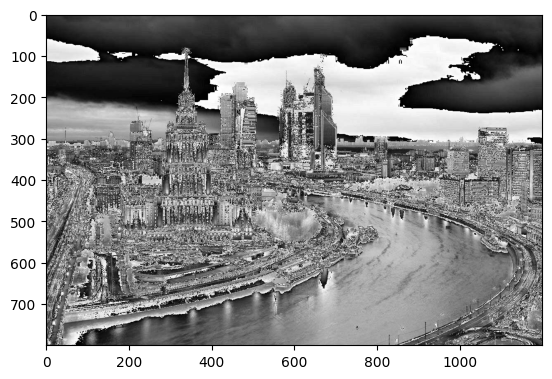

Время выполнения блока кода: 5.302610158920288 секунд


In [21]:
start_time = time.time()
new_pix = image_arr.copy()
for i in range(800):
    for j in range(1200):
        s = image_arr[i][j].sum()
        new_pix[i][j][0] = s
        new_pix[i][j][1] = s
        new_pix[i][j][2] = s
new_img1 = Image.fromarray(same_pix)
plt.imshow(new_img1)
plt.show()
end_time = time.time()
execution_time = end_time - start_time
print(f"Время выполнения блока кода: {execution_time} секунд")

## Scipy

In [22]:
from scipy.optimize import curve_fit

## np.random 
```np.random.random(10)``` - массив размера 10 со значениями от 0 до 1 \
```np.random.normal``` - loc=среднее значение, scale=стандартное отклонение, size=размер \
```np.random.randint(a, b, размер)``` - массив где рандомные числа от a до b

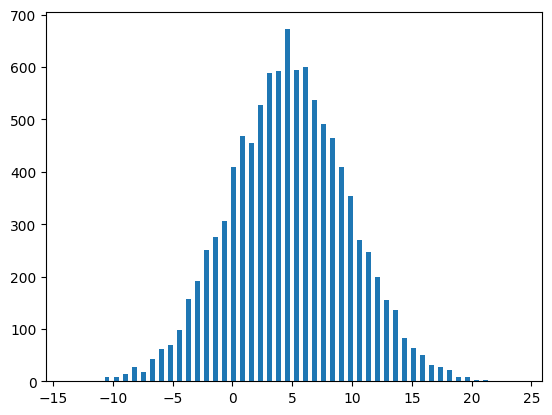

In [23]:
np.random.seed(0)
x = np.random.normal(5, 5, 10000)
plt.hist(x, bins=50, width=0.4)
plt.show()

## Апроксимация функции синуса

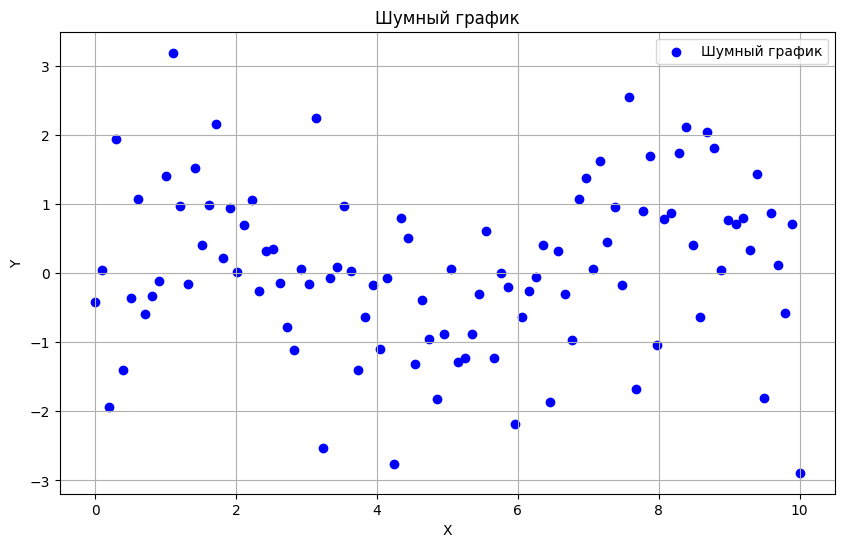

In [24]:
np.random.seed(2)
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(0, 1, len(x))
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Шумный график')
plt.title('Шумный график')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()
     

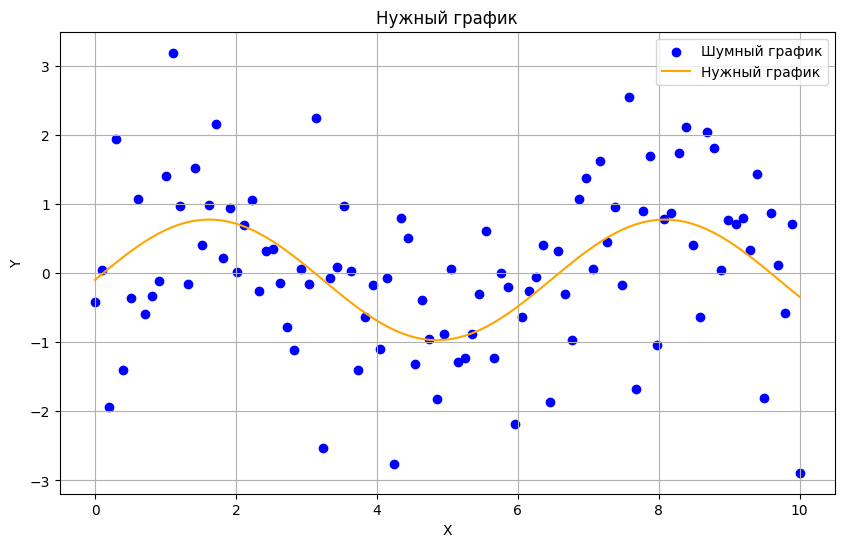

In [25]:
def func(x, a, b, c):
    return a * np.sin(b * x) + c
params, covariance = curve_fit(func, x, y)
a, b, c = params
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Шумный график')
plt.plot(x, func(x, a, b, c), color='orange', label='Нужный график')
plt.title('Нужный график')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()

Линейная регрессия

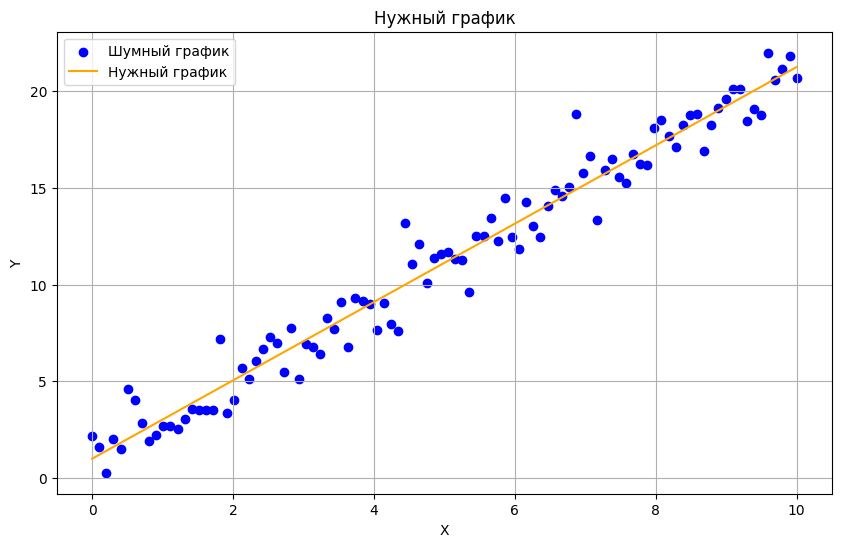

In [26]:
def func(x, a, b):
    return a * x + b
x = np.linspace(0, 10, 100)
y = 2 * x + 1 + np.random.normal(0, 1, len(x))
params, covariance = curve_fit(func, x, y)
a, b = params
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Шумный график')
plt.plot(x, func(x, a, b), color='orange', label='Нужный график')
plt.title('Нужный график')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()

In [27]:
import scipy

In [28]:
sin_90 = scipy.special.sindg(90)
sin_90

1.0

In [29]:
#  интеграл от 0 до 4
scipy.integrate.quad(lambda x: 3 * x ** 2, 0, 4)

(64.0, 7.105427357601002e-13)

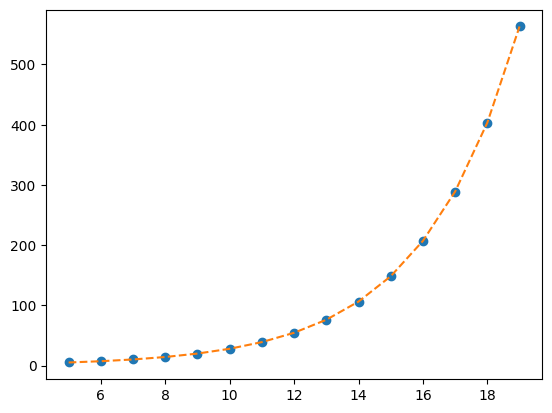

In [30]:
x = np.arange(5, 20)
y = np.exp(x / 3.0)

f = scipy.interpolate.interp1d(x, y) # интерполяция 

x1 = np.arange(5, 20)
y1 = f(x1)

plt.plot(x, y, 'o', x1, y1, '--')
plt.show()

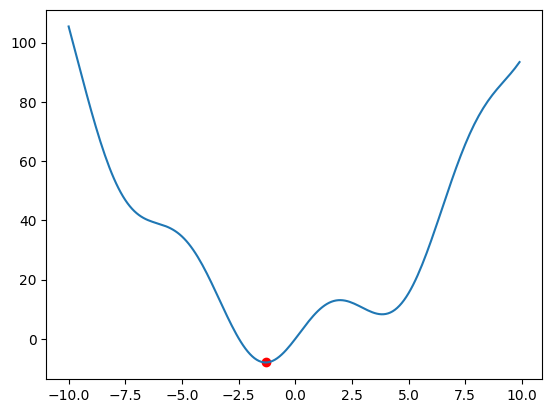

In [31]:
def f(x):
    return x * x + 10 * np.sin(x)

x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x))
x_min = scipy.optimize.brute(f, ((-10, 10, 0.1),)) # нахождение локального минимума
plt.scatter(x_min, f(x_min), color='r')
plt.show()

In [32]:
x_min = scipy.optimize.dual_annealing(f, ((-10, 10, 0.1),))  # второй способ
x_min

 message: ['Maximum number of iteration reached']
 success: True
  status: 0
     fun: -7.945823375615284
       x: [-1.306e+00]
     nit: 1000
    nfev: 2017
    njev: 8
    nhev: 0